### Loan Default Prediction - Vinod K Batra
#### This code was submitted to Wilson Analytics/Great Learning Hackathon.
#### The final RandomForest model achieved an accuracy of 99.4%.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("training_data.csv")

/var/folders/ls/0hfs2tt552zgq_q82sjyhh3hg421v4/T/ipykernel_14701/2045762144.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("training_data.csv")


In [3]:
df_train.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000
mean,52499.50000,12.688648,10.379248,9.904248,405918.304276,156.438362,4.661622e+09,2707.201638,0.277181
std,30311.03347,270.544185,270.340849,58.157056,260335.963766,116.412721,2.546599e+09,12660.609090,0.447609
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26249.75000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.478163e+09,0.000000,0.000000
50%,52499.50000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.119824e+09,1.000000,0.000000
75%,78749.25000,4.000000,1.000000,9.000000,561740.000000,180.000000,6.760484e+09,1.000000,1.000000
max,104999.00000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


In [4]:
df_test = pd.read_csv("testing_data.csv")

<span style='color:blue'> **Remove Spaces from the column names** </span>

In [5]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105000 non-null  int64 
 1   Date_Of_Disbursement      104765 non-null  object
 2   Business                  104985 non-null  object
 3   Jobs_Reatained            105000 non-null  int64 
 4   Jobs_Created              105000 non-null  int64 
 5   Year_Of_Commitment        105000 non-null  object
 6   Guaranteed_Approved_Loan  105000 non-null  object
 7   Borrower_Name             104997 non-null  object
 8   Low_Documentation_Loan    104633 non-null  object
 9   Demography                105000 non-null  object
 10  State_Of_Bank             105000 non-null  object
 11  ChargedOff_Amount         105000 non-null  object
 12  Borrower_City             105000 non-null  object
 13  Borrower_State            105000 non-null  object
 14  Gros

<AxesSubplot:xlabel='Borrower_State'>

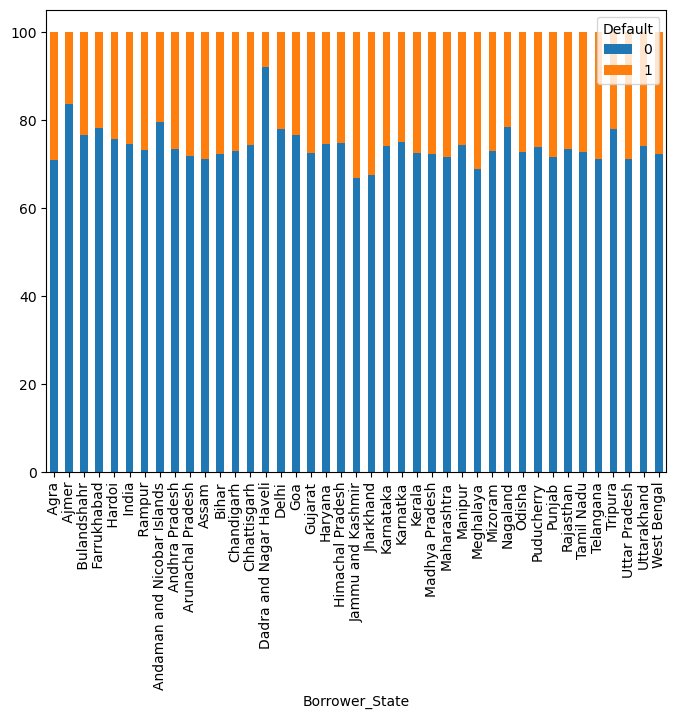

In [7]:
(pd.crosstab(df_train['Borrower_State'], df_train['Default'], normalize='index')*100).plot(kind='bar', figsize=(8,6), stacked=True)

<span style='color:blue'> **The following columns have Rs as prefix.** </span>

In [8]:
columns_to_convert=['Guaranteed_Approved_Loan','Gross_Amount_Disbursed','Loan_Approved_Gross','ChargedOff_Amount']

In [9]:
columns_to_drop=['ID','Borrower_Name','State_Of_Bank','Borrower_City','Borrower_State','Classification_Code','Primary_Loan_Digit','Code_Franchise','Name_Of_Bank','Gross_Amount_Balance','Date_Of_Disbursement','Year_Of_Commitment','Commitment_Date']

In [10]:
df_train = df_train.drop(columns=columns_to_drop, axis=1)
df_test = df_test.drop(columns=columns_to_drop, axis=1)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Business                  104985 non-null  object
 1   Jobs_Reatained            105000 non-null  int64 
 2   Jobs_Created              105000 non-null  int64 
 3   Guaranteed_Approved_Loan  105000 non-null  object
 4   Low_Documentation_Loan    104633 non-null  object
 5   Demography                105000 non-null  object
 6   ChargedOff_Amount         105000 non-null  object
 7   Count_Employees           105000 non-null  int64 
 8   Loan_Approved_Gross       105000 non-null  object
 9   Gross_Amount_Disbursed    105000 non-null  object
 10  Loan_Term                 105000 non-null  int64 
 11  Revolving_Credit_Line     104509 non-null  object
 12  Default                   105000 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 10.4+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Business                  44994 non-null  object
 1   Jobs_Reatained            45000 non-null  int64 
 2   Jobs_Created              45000 non-null  int64 
 3   Guaranteed_Approved_Loan  45000 non-null  object
 4   Low_Documentation_Loan    44867 non-null  object
 5   Demography                45000 non-null  object
 6   ChargedOff_Amount         45000 non-null  object
 7   Count_Employees           45000 non-null  int64 
 8   Loan_Approved_Gross       45000 non-null  object
 9   Gross_Amount_Disbursed    45000 non-null  object
 10  Loan_Term                 45000 non-null  int64 
 11  Revolving_Credit_Line     31175 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.1+ MB


In [13]:
credit_numeric = {'T':'Yes', '`':'No','2':'No','4':'No','C':'No','R':'No','1':'Yes','.':'No','0':'No'}
df_train['Revolving_Credit_Line'].replace(credit_numeric, inplace=True)
df_test['Revolving_Credit_Line'].replace(credit_numeric, inplace=True)

<span style='color:blue'> **Function to Remove Rs prefix and convert the dtype to float** </span>

In [14]:

def convert_column(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('Rs.',"").astype('float')
    return df

In [15]:
df_train = convert_column(df_train, columns_to_convert)

/var/folders/ls/0hfs2tt552zgq_q82sjyhh3hg421v4/T/ipykernel_14701/3183922154.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('Rs.',"").astype('float')


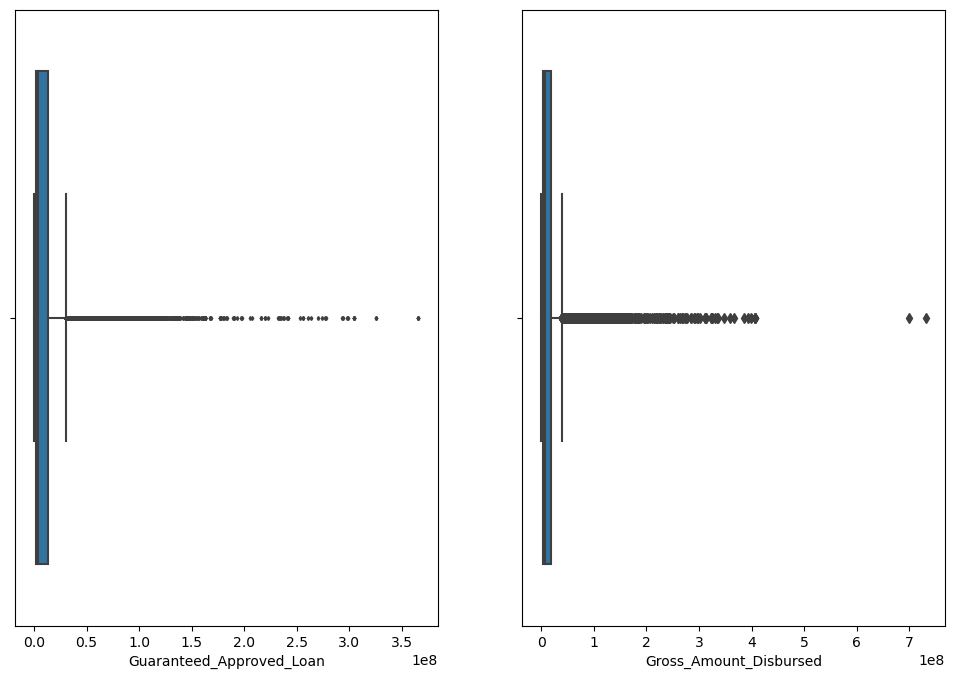

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(data=df_train, x='Guaranteed_Approved_Loan', fliersize=2,ax=ax[0])
ax[0].invert_yaxis()
sns.boxplot(data=df_train, x='Gross_Amount_Disbursed',  ax=ax[1])
plt.show()

In [17]:
df_test = convert_column(df_test, columns_to_convert)

/var/folders/ls/0hfs2tt552zgq_q82sjyhh3hg421v4/T/ipykernel_14701/3183922154.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('Rs.',"").astype('float')


In [18]:
for col in columns_to_convert:
    print(df_train[col].describe().T)
    print ('-'* 50)

count    1.050000e+05
mean     1.151738e+07
std      1.818916e+07
min      4.064000e+04
25%      1.625600e+06
50%      4.226560e+06
75%      1.316736e+07
max      3.657600e+08
Name: Guaranteed_Approved_Loan, dtype: float64
--------------------------------------------------
count    1.050000e+05
mean     1.563878e+07
std      2.288627e+07
min      3.251200e+05
25%      3.251200e+06
50%      7.802880e+06
75%      1.812579e+07
max      7.311136e+08
Name: Gross_Amount_Disbursed, dtype: float64
--------------------------------------------------
count    1.050000e+05
mean     1.492200e+07
std      2.262852e+07
min      8.128000e+04
25%      2.600960e+06
50%      6.502400e+06
75%      1.690624e+07
max      4.064000e+08
Name: Loan_Approved_Gross, dtype: float64
--------------------------------------------------
count    1.050000e+05
mean     1.711913e+06
std      6.520106e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.170168e+05
max      1.625599e+08
Name: Cha

In [19]:
ldl_numeric = {'S':'No', 'A':'No','2':'No','4':'No','C':'No','R':'No','1':'Yes','.':'No','0':'No'}


In [20]:
df_train['Low_Documentation_Loan'].replace(ldl_numeric, inplace=True)
df_test['Low_Documentation_Loan'].replace(ldl_numeric, inplace=True)

In [21]:
churn_numeric = {'T':'Yes', '`':'No','2':'No','4':'No','C':'No','R':'No','1':'Yes','.':'No','0':'No'}


In [22]:
df_train['Revolving_Credit_Line'].replace(churn_numeric, inplace=True)
df_test['Revolving_Credit_Line'].replace(churn_numeric, inplace=True)

In [23]:
df_train['Business'] = df_train['Business'].replace('0', 'New')
df_test['Business'] = df_test['Business'].replace('0', 'New')

In [24]:
median = df_train.loc[(df_train['Loan_Term'] > 12) & (df_train['Loan_Term'] < 300)]['Loan_Term'].median()

In [25]:
print(median)

126.0


<span style='color:blue'> **Some of the loan terms are 0 or more than 70 years term.**<BR>
**Impute those values with the median value ** </span>

In [26]:
df_train["Loan_Term"] = np.where(df_train["Loan_Term"] > median, median,df_train['Loan_Term'])

In [27]:
df_test["Loan_Term"] = np.where(df_test["Loan_Term"] > median, median,df_test['Loan_Term'])

In [28]:
df_train.isnull().sum()

Business                     15
Jobs_Reatained                0
Jobs_Created                  0
Guaranteed_Approved_Loan      0
Low_Documentation_Loan      367
Demography                    0
ChargedOff_Amount             0
Count_Employees               0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Loan_Term                     0
Revolving_Credit_Line       491
Default                       0
dtype: int64

In [29]:
df_train.nunique()

Business                        2
Jobs_Reatained                191
Jobs_Created                  128
Guaranteed_Approved_Loan    10138
Low_Documentation_Loan          2
Demography                      3
ChargedOff_Amount           23059
Count_Employees               282
Loan_Approved_Gross          6218
Gross_Amount_Disbursed      23443
Loan_Term                      85
Revolving_Credit_Line           2
Default                         2
dtype: int64

In [30]:
df_train['Business'].fillna('New')
df_test['Business'].fillna('New')

0        Existing
1        Existing
2        Existing
3             New
4        Existing
           ...   
44995    Existing
44996    Existing
44997    Existing
44998    Existing
44999    Existing
Name: Business, Length: 45000, dtype: object

In [31]:
df_train['Business'].isnull().sum()

15

In [32]:
df_train

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Revolving_Credit_Line,Default
0,Existing,0,0,33121600.0,No,Undefined,0.00,38,40640000.0,40640000.00,126.0,No,0
1,New,0,6,32735520.0,No,Urban,38283367.68,6,43647360.0,43647360.00,123.0,No,1
2,Existing,4,0,1422400.0,No,Urban,0.00,4,2844800.0,5961400.32,90.0,Yes,0
3,New,9,1,2032000.0,No,Urban,0.00,7,4064000.0,4064000.00,126.0,Yes,0
4,Existing,4,0,22981920.0,No,Urban,22862519.68,4,30642560.0,30642560.00,104.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,New,0,0,5136896.0,Yes,Undefined,0.00,1,6421120.0,6421120.00,126.0,No,0
104996,New,0,0,6908800.0,Yes,Rural,0.00,2,8128000.0,8128000.00,126.0,No,0
104997,New,6,0,812800.0,No,Urban,971296.00,5,1625600.0,1625600.00,34.0,No,1
104998,Existing,0,3,10810240.0,No,Urban,0.00,39,10810240.0,9916160.00,126.0,No,0


In [33]:
df_train = df_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [34]:
df_test.nunique()

Business                        2
Jobs_Reatained                149
Jobs_Created                  100
Guaranteed_Approved_Loan     6151
Low_Documentation_Loan          2
Demography                      3
ChargedOff_Amount           10833
Count_Employees               197
Loan_Approved_Gross          3963
Gross_Amount_Disbursed      11723
Loan_Term                      85
Revolving_Credit_Line           2
dtype: int64

In [35]:
df_test.isnull().sum().sum()

0

In [36]:
df_train['Revolving_Credit_Line'].value_counts()

No     78235
Yes    26765
Name: Revolving_Credit_Line, dtype: int64

In [37]:
yes_no = {"No":0,"Yes":1}
new_existing = {"New":0,"Existing":1}

In [38]:
df_train['Low_Documentation_Loan'].replace(yes_no, inplace=True)
df_test['Low_Documentation_Loan'].replace(yes_no, inplace=True)

In [39]:
df_train['Revolving_Credit_Line'].replace(yes_no, inplace=True)
df_test['Revolving_Credit_Line'].replace(yes_no, inplace=True)

In [40]:
df_train['Business'].replace(new_existing, inplace=True)
df_test['Business'].replace(new_existing, inplace=True)

In [41]:
df_test['Demography'].nunique()

3

In [42]:
cor = df_train.corr()

<AxesSubplot:>

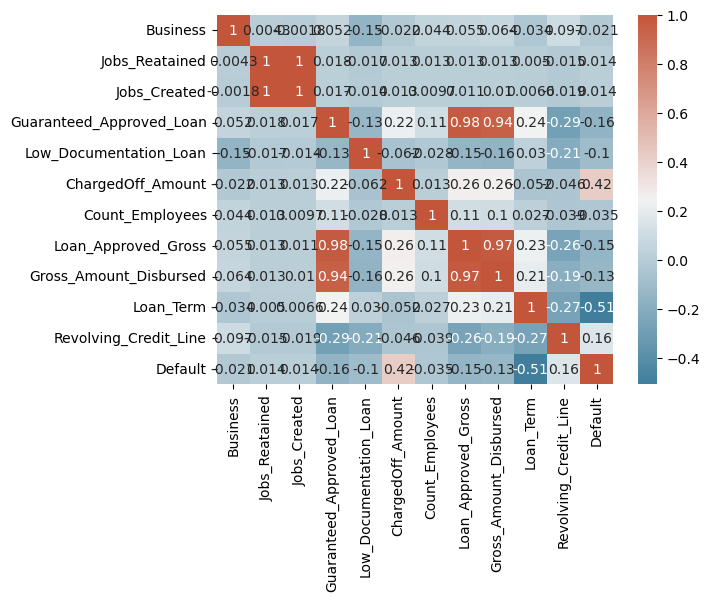

In [43]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(cor, cmap=cmap, annot=True)

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
df_train['Demography'] = df_train['Demography'].astype('category')
df_test['Demography'] = df_test['Demography'].astype('category')

In [46]:
df_train.shape

(105000, 13)

In [47]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Business                  45000 non-null  int64  
 1   Jobs_Reatained            45000 non-null  int64  
 2   Jobs_Created              45000 non-null  int64  
 3   Guaranteed_Approved_Loan  45000 non-null  float64
 4   Low_Documentation_Loan    45000 non-null  int64  
 5   ChargedOff_Amount         45000 non-null  float64
 6   Count_Employees           45000 non-null  int64  
 7   Loan_Approved_Gross       45000 non-null  float64
 8   Gross_Amount_Disbursed    45000 non-null  float64
 9   Loan_Term                 45000 non-null  float64
 10  Revolving_Credit_Line     45000 non-null  int64  
 11  Demography_Rural          45000 non-null  uint8  
 12  Demography_Undefined      45000 non-null  uint8  
 13  Demography_Urban          45000 non-null  uint8  
dtypes: flo

In [49]:
from sklearn.preprocessing import MinMaxScaler


In [50]:
scaler = MinMaxScaler()

In [51]:
df_train[['Gross_Amount_Disbursed','Guaranteed_Approved_Loan']] = scaler.fit_transform(df_train[['Gross_Amount_Disbursed','Guaranteed_Approved_Loan']])

In [52]:
df_test[['Gross_Amount_Disbursed','Guaranteed_Approved_Loan']] = scaler.fit_transform(df_test[['Gross_Amount_Disbursed','Guaranteed_Approved_Loan']])

In [53]:
df_train[['Loan_Term','Loan_Approved_Gross','Jobs_Reatained','Jobs_Created','ChargedOff_Amount']] = scaler.fit_transform(df_train[['Loan_Term','Loan_Approved_Gross','Jobs_Reatained','Jobs_Created','ChargedOff_Amount']])

In [54]:
df_test[['Loan_Term','Loan_Approved_Gross','Jobs_Reatained','Jobs_Created','ChargedOff_Amount']] = scaler.fit_transform(df_test[['Loan_Term','Loan_Approved_Gross','Jobs_Reatained','Jobs_Created','ChargedOff_Amount']])

In [55]:
df_train.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,ChargedOff_Amount,Count_Employees,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Revolving_Credit_Line,Default,Demography_Rural,Demography_Undefined,Demography_Urban
0,1,0.000000,0.000000,0.090454,0,0.000000,38,0.099820,0.055166,1.000000,0,0,0,1,0
1,0,0.000000,0.000682,0.089399,0,0.235503,6,0.107221,0.059282,0.976190,0,1,0,0,1
2,1,0.000455,0.000000,0.003778,0,0.000000,4,0.006801,0.007713,0.714286,1,0,0,0,1
3,0,0.001023,0.000114,0.005445,0,0.000000,7,0.009802,0.005116,1.000000,1,0,0,0,1
4,1,0.000455,0.000000,0.062729,0,0.140641,4,0.075215,0.041486,0.825397,0,1,0,0,1


In [56]:
df_train[['Count_Employees']] = scaler.fit_transform(df_train[['Count_Employees']])

In [57]:
df_test[['Count_Employees']] = scaler.transform(df_test[['Count_Employees']])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [59]:
df_train['Default'].value_counts()

0    75896
1    29104
Name: Default, dtype: int64

In [60]:
X_no = df_train[df_train.Default == 0]
X_yes = df_train[df_train.Default == 1]

In [61]:
print(len(X_no))
print(len(X_yes))

75896
29104


### The data is imbalanced. Upsampled to the same number 

In [62]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

/var/folders/ls/0hfs2tt552zgq_q82sjyhh3hg421v4/T/ipykernel_14701/3153804786.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)


In [63]:
X_upsampled['Default'].value_counts()

0    75896
1    75896
Name: Default, dtype: int64

In [64]:
X = X_upsampled.drop(['Default'], axis=1) #features (independent variables)
y = X_upsampled['Default']

In [65]:
y.shape

(151792,)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151792 entries, 0 to 151791
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Business                  151792 non-null  int64  
 1   Jobs_Reatained            151792 non-null  float64
 2   Jobs_Created              151792 non-null  float64
 3   Guaranteed_Approved_Loan  151792 non-null  float64
 4   Low_Documentation_Loan    151792 non-null  int64  
 5   ChargedOff_Amount         151792 non-null  float64
 6   Count_Employees           151792 non-null  float64
 7   Loan_Approved_Gross       151792 non-null  float64
 8   Gross_Amount_Disbursed    151792 non-null  float64
 9   Loan_Term                 151792 non-null  float64
 10  Revolving_Credit_Line     151792 non-null  int64  
 11  Demography_Rural          151792 non-null  uint8  
 12  Demography_Undefined      151792 non-null  uint8  
 13  Demography_Urban          151792 non-null  u

In [67]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Satisfied', 'Not Satisfied'], yticklabels=['Satisfied', 'Not Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [69]:
log_reg = LogisticRegression(random_state=1)

#fit the logistic regression model
log_reg.fit(X_train, y_train)

/Users/batra1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     60785
           1       0.92      0.92      0.92     60648

    accuracy                           0.92    121433
   macro avg       0.92      0.92      0.92    121433
weighted avg       0.92      0.92      0.92    121433



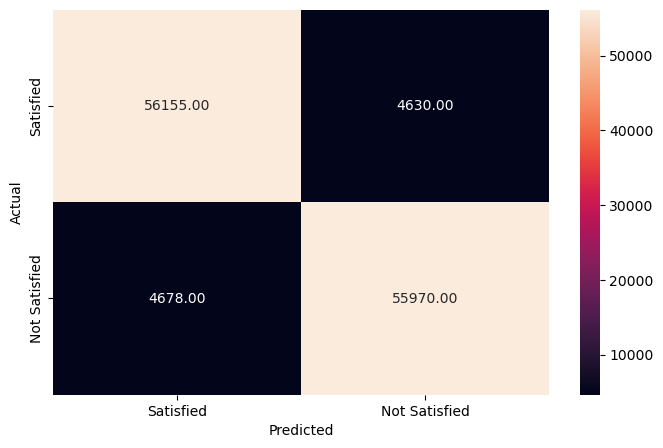

In [70]:
import matplotlib.pyplot as plt
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     15111
           1       0.93      0.92      0.92     15248

    accuracy                           0.92     30359
   macro avg       0.92      0.92      0.92     30359
weighted avg       0.92      0.92      0.92     30359



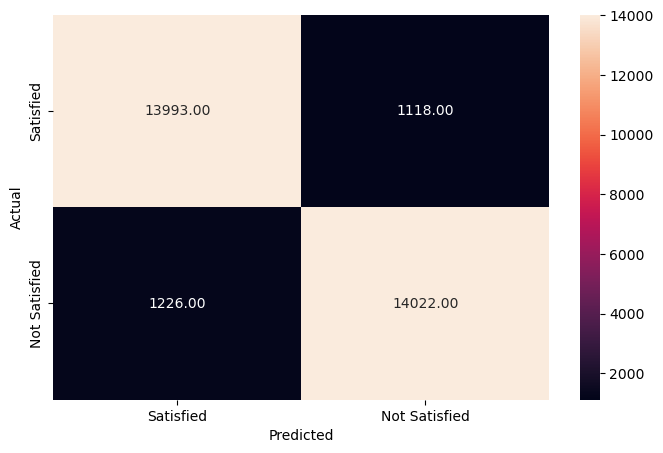

In [71]:
y_pred_test = log_reg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=60,max_depth=7, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=60, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     60785
           1       0.99      1.00      0.99     60648

    accuracy                           0.99    121433
   macro avg       0.99      0.99      0.99    121433
weighted avg       0.99      0.99      0.99    121433



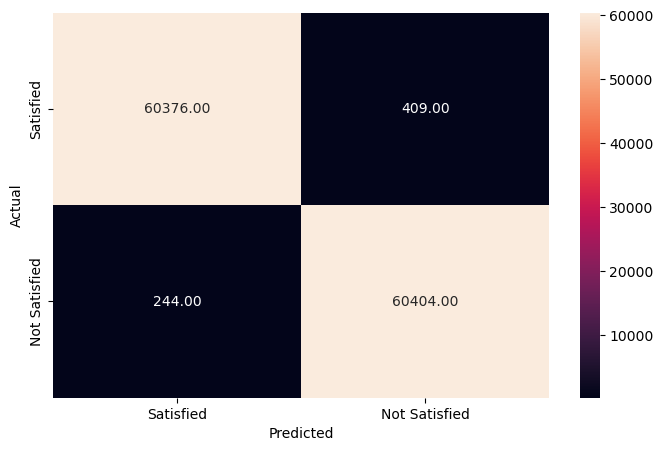

In [73]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15111
           1       0.99      1.00      0.99     15248

    accuracy                           0.99     30359
   macro avg       0.99      0.99      0.99     30359
weighted avg       0.99      0.99      0.99     30359



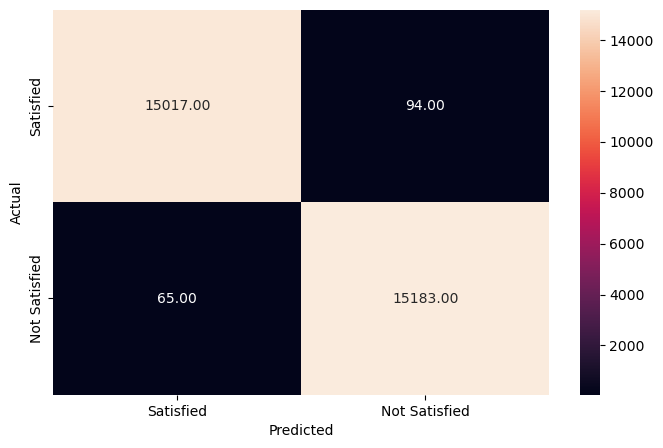

In [74]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

/Users/batra1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


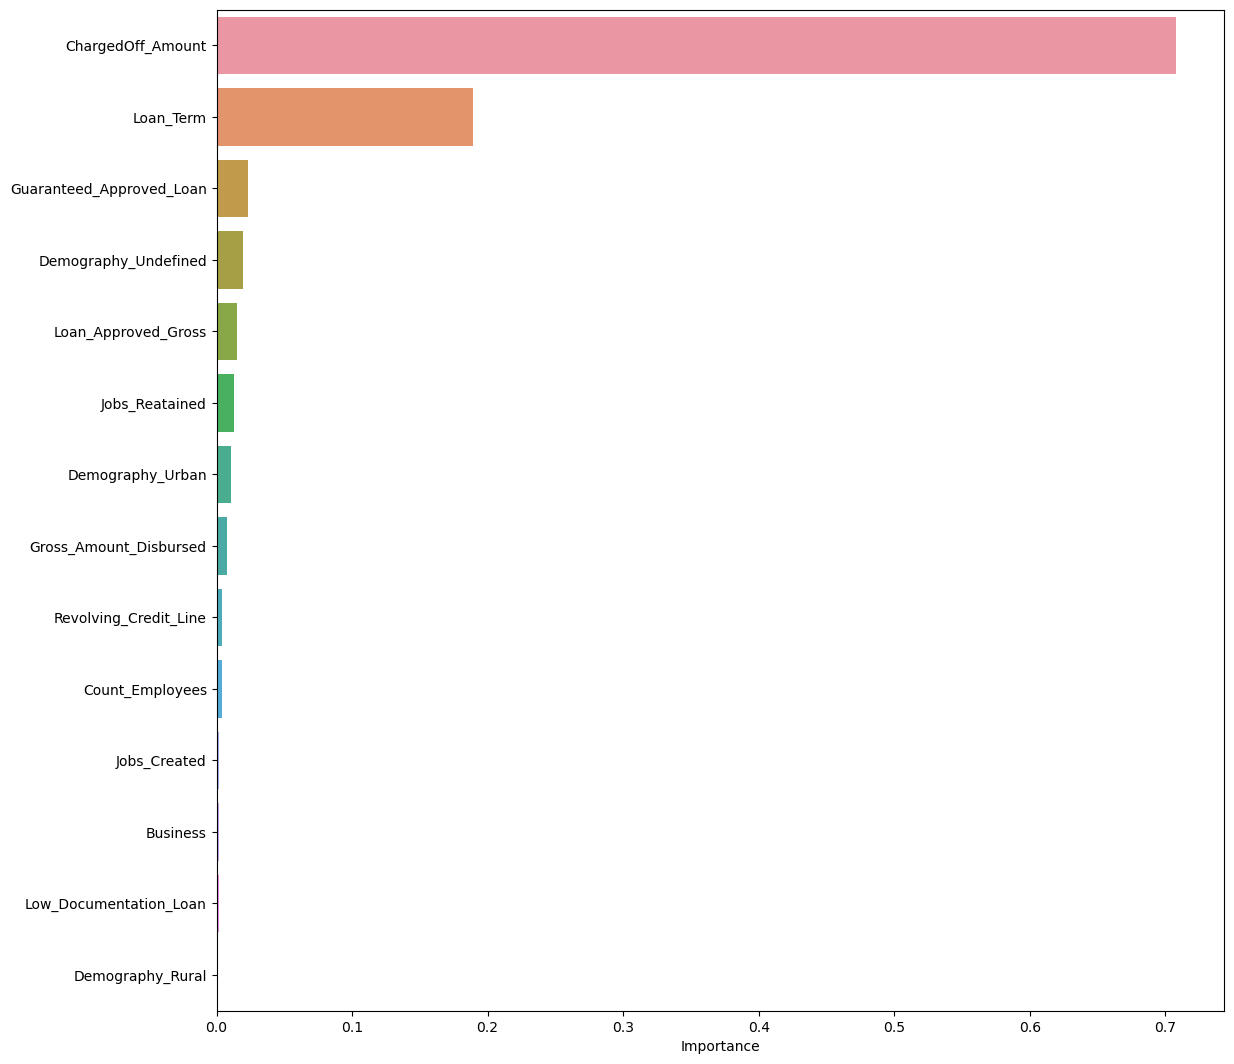

In [75]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index);

In [76]:
y_pred_unknown_rf = rf_estimator.predict(df_test)

In [77]:
len(y_pred_unknown_rf)

45000

In [78]:
y_pred_unknown_rf[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [79]:
orig_data = pd.read_csv("testing_data.csv")
output = pd.DataFrame({'ID':orig_data["ID"], "Default":y_pred_unknown_rf})
#output = pd.DataFrame({'ID':raw_data["ID"], "Overall_Experience":y_pred_test_rf})
output.to_csv("solution1_newbie2.csv", index=False)

In [80]:
output.shape

(45000, 2)

In [81]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [82]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
                                                         1336, 1431, 1526, 1621,
                                                         1715, 1810, 1905,
      

In [83]:
rf_random.best_params_

{'n_estimators': 389,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [84]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=90, n_estimators=389)

In [85]:
from sklearn.model_selection import cross_val_score
#rfc_cv = RandomForestClassifier(n_estimators=100)
#accuracies = []
rfc_cv = rf_random.best_estimator_
scores_train_rf = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
scores_test_rf = cross_val_score(rfc_cv, X_test, y_test, cv=10, scoring = "accuracy")


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=389; total time=  55.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=578; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=578; total time= 1.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1715; total time= 4.3min
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=389; total time= 1.4min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1052; total time= 2.5min
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1715; total time= 4.2min
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=673; total time= 2.5min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1905; total time= 4.2min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1810; total time= 6.5min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=484; total time= 1.2min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1052; total time= 3.7min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=957; total time= 3.2min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=768; total time= 2.8min
[CV] END bootstrap=False, max_depth=80

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1147; total time= 3.6min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1715; total time= 4.3min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1810; total time= 6.5min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=863; total time= 3.0min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=768; total time= 1.8min
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1526; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1336; total time= 3.4min
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=673; total time= 2.5min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1905; total time= 4.2min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1810; total time= 6.4min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=484; total time= 1.2min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1052; total time= 3.7min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=957; total time= 3.3min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1621; total time= 3.8min
[CV] END bootstrap=True, max_depth=Non

In [86]:
accuracies = []
accuracies.append(scores_train_rf.mean()*100)
accuracies.append(scores_test_rf.mean()*100)
print (accuracies)

[99.58330987007375, 99.52897465450292]


In [87]:
y_pred_unknown_rf = rfc_cv.predict(df_test)

In [88]:
y_pred_unknown_rf[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [89]:
output = pd.DataFrame({'ID':orig_data["ID"], "Default":y_pred_unknown_rf})
#output = pd.DataFrame({'ID':raw_data["ID"], "Overall_Experience":y_pred_test_rf})
output.to_csv("solution2_newbie2.csv", index=False)

In [90]:
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

2023-07-10 17:29:08.276407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
from tensorflow.keras import backend
backend.clear_session()
import tensorflow as tf
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [97]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = 14))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [98]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)

# Define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random = RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [99]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
3036/3036 [==============================] - 8s 2ms/step - loss: 0.2173 - accuracy: 0.9155 - val_loss: 0.1152 - val_accuracy: 0.9581
Best: 0.973360 using {'lr': 0.001, 'batch_size': 32}


In [100]:
estimator_v4 = create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               3840      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

In [102]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4 = estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
1518/1518 [==============================] - 5s 3ms/step - loss: 0.2595 - accuracy: 0.8964 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 2/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0954 - accuracy: 0.9709 - val_loss: 0.0607 - val_accuracy: 0.9841
Epoch 3/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0740 - accuracy: 0.9799 - val_loss: 0.0511 - val_accuracy: 0.9878
Epoch 4/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0662 - accuracy: 0.9820 - val_loss: 0.0543 - val_accuracy: 0.9870
Epoch 5/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0615 - accuracy: 0.9839 - val_loss: 0.0554 - val_accuracy: 0.9858
Epoch 6/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0579 - accuracy: 0.9855 - val_loss: 0.0526 - val_accuracy: 0.9869
Epoch 7/50
1518/1518 [==============================] - 4s 3ms/step - loss: 0.0583 - accuracy: 0.9855 - val_loss: 0.0509 - val_accuracy:

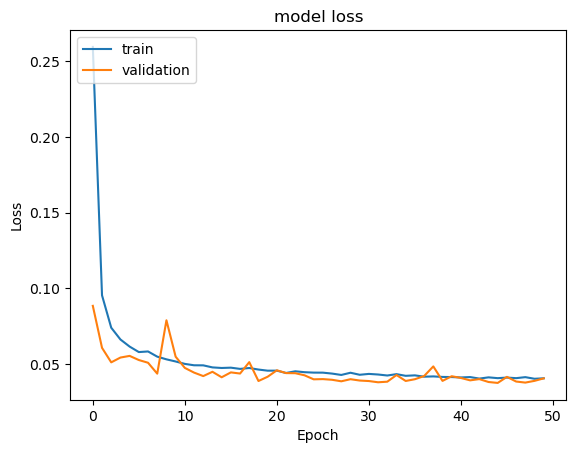

In [103]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

949/949 [==============================] - 1s 1ms/step
Best Threshold=0.917074, G-Mean=0.993


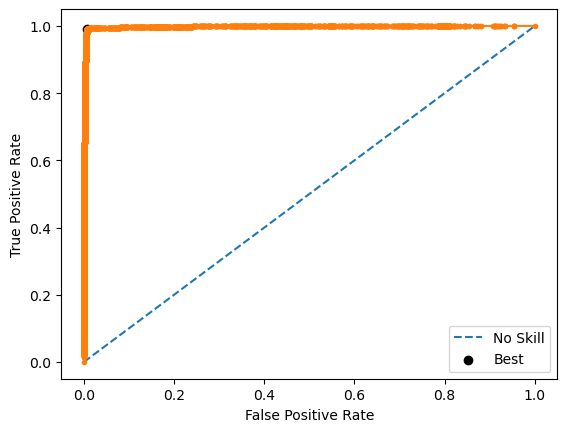

In [105]:
yhat4 = estimator_v4.predict(X_test)

# Keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]

# Calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)

# Calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))

# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()

In [107]:
yhat4 = estimator_v4.predict(X_test)

949/949 [==============================] - 1s 1ms/step


In [108]:
yhat4

array([[9.97769594e-01],
       [1.71673018e-02],
       [9.99418080e-01],
       ...,
       [1.24928165e-05],
       [2.08002422e-03],
       [1.26140751e-03]], dtype=float32)